Homework 4   Yutong Ji

# Part 1. Numerov algorithm for the Schrödinger equation

## 1.1 Numerical solution

In [78]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [87]:
#function of k
def kfun(x0):
    k0=2*E-x0**2
    k1=2*E-(x0+h)**2
    k2=2*E-(x0+2*h)**2
    return k0,k1,k2

In [89]:
# function of Numerov Method
def Numerov(E,m,h,y0,y1):
    for x in np.arange(0,m-2.1*h,h):
        K=kfun(x)
        y2=(2*(1-5/12*h**2*K[1])*y1-(1+1/12*h**2*K[1])*y0)/(1+1/12*h**2*K[2])
        y.append(y2)
        y0=y1
        y1=y2
    return y #return to a list of y

### 1.1.1 When n is even:

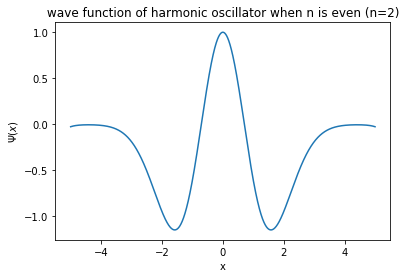

In [90]:
#changing varibles 
E=5/2#energy
h=0.0001#step
m=5#the maximum of x 

#innitial values for even n
y0=1
y1=y0-h**2*k0*y0/2
y=[y0,y1]
x0=0
k0=2*E-x0**2


y=Numerov(E,m,h,y0,y1)
#plot the wave function
c=y[::-1]# get the function on the side of x<0
yy=c+y
xx=np.arange(-m,m,h)
plt.plot(xx,yy)
plt.title(' wave function of harmonic oscillator when n is even (n=2) ')
plt.xlabel('x')
plt.ylabel('$\Psi(x)$')
plt.show()

### 1.1.2 When n is odd:

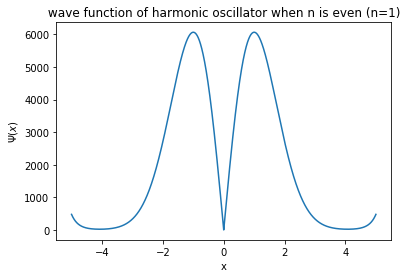

In [91]:
#Similar to above, just change Energy and initial values of y
#changing varibles 
E=3/2
h=0.0001
m=5
#innitial values for odd n
x0=0
k0=2*E-x0**2
y0=0
y1=1
y=[y0,y1]
y=Numerov(E,m,h,y0,y1)
c=y[::-1]
yy=c+y
xx=np.arange(-m,m,h)
plt.plot(xx,yy)
plt.title(' wave function of harmonic oscillator when n is even (n=1) ')
plt.xlabel('x')
plt.ylabel('$\Psi(x)$')
plt.show()

## 1.2 Analytical solution

In [104]:
# define a function to get a series of hermit polynomial
def Hermit(kk,n):
    H0=1
    H1=2*kk
    H=[H0,H1]
    for n in range(2,5):
        H2=2*kk*H1-2*(n-1)*H0
        H.append(H2)
        H0=H1
        H1=H2
    return H 

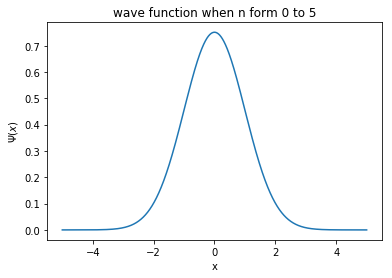

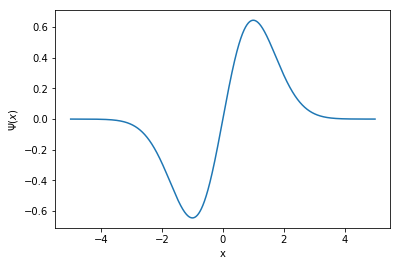

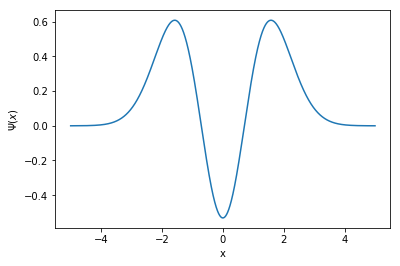

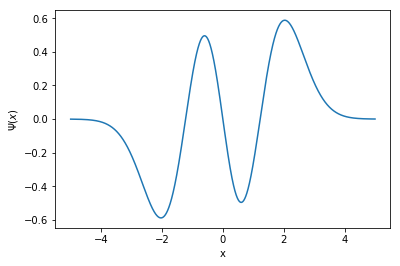

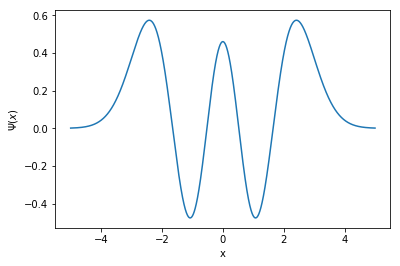

Text(0.5,1,'wave function when n form 0 to 5')

In [105]:
#loop from 0 to 5 to get analytical solution of different n
for n in range(5):
    h=0.0001
    YY=[]
    for i in np.arange(-m,m,h):
        H=Hermit(i,n)
        Y=H[n]/np.sqrt((2**n*np.math.factorial(n)*np.sqrt(math.pi)))*np.exp(-i**2/2)
        YY.append(Y)
    xx=np.arange(-m,m,h)    
    plt.plot(xx,YY) 
    plt.xlabel('x')
    plt.ylabel('$\Psi(x)$')
    plt.show()
plt.title('wave function when n form 0 to 5')

# Part 2. Neutrons in the gravitional field

 Another interesting application of the Numerov algorithm is the calculation of stationary states $\Psi(z)$ of neutrons in the gravitational field of the Earth. For small changes in the vertical amplitude $z$ the potential can be expressed as $V (z) = mgz$ for $z ≥ 0$. Place a perfectly reflecting horizontal mirror at $z = 0$ so that $V (z) = ∞$ for $z < 0$. Neutrons that fall onto the mirror are reflected upwards, and so we only seek solutions for $z ≥ 0$. After a proper choice of length and energy units (please specify!) the above equation can be rewritten as $$ψ′′(x)+(ε−x)ψ(x) = 0 $$

1. Use the Numerov method to solve this differential equation. Choose some values of ε and plot the solution from $x = 0$ to $x ≫ ε$ (i.e. well into the classically forbidden zone). We are interested in the asymptotic behavior of the solution for large x, i.e. whether it goes to positive infinity or negative. Show (plot) two solutions obtained from your program (for two values of ε), one with positive and one with negative asymptotic behaviour.

Choose length and energy units

According to Schrödinger equation for stationary states: $$H\Psi(z)=E\Psi(z)$$ We get $$\frac{d^2 \Psi(z)}{dz^2}+2m/\hbar^2(E-mgz)\Psi(z)=0$$ 

If we switch $z$  to  $x=z(2m^2g/\hbar^2)^1/3$ and $E$  to  $\varepsilon=(2\hbar/mg^2)^1/3$

Then we get $$\frac{d^2 \psi(x)}{dx^2}+(\varepsilon-x)\psi(x)=0$$ 

# 2.1.a Positive asymptotic

In [138]:
#function of k
def kfun2(E,x0):
    k0=E-x0
    k1=E-(x0+h)
    k2=E-(x0+2*h)
    return k0,k1,k2
def Numerov(E,m,h,y0,y1):
    for x in np.arange(0,m-2.1*h,h):
        K=kfun2(E,x)
        y2=(2*(1-5/12*h**2*K[1])*y1-(1+1/12*h**2*K[1])*y0)/(1+1/12*h**2*K[2])
        y.append(y2)
        y0=y1
        y1=y2
    return y

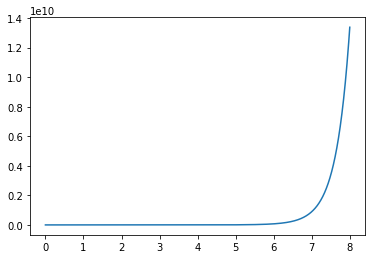

In [139]:
#changing varibles 
E=0.0001
h=0.0001
m=8
#innitial values
y0=0
y1=1.0
x0=0
y=[y0,y1]

y=Numerov(E,m,h,y0,y1)
xx=np.arange(0,m,h)
yy=np.array(y)
plt.plot(xx,yy)
plt.show()

# 2.1.b Negative asymptotic

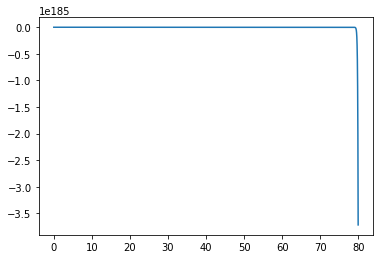

In [140]:
#changing varibles 
E=6
h=0.01
m=80
#innitial values
y0=0
y1=1.0
x0=0
y=[y0,y1]

y=Numerov(E,m,h,y0,y1)
xx=np.arange(0,m,h)
yy=np.array(y)
plt.plot(xx,yy)
plt.show()

2.The eigenvalues  $ε_{n}$ of Schrödinger’s equation belong to normalizable eigenfunctions with ψ(x) → 0 for x → ∞. It means that while varying εn from smaller to larger values, the function ψ(x) for x → ∞ changes sign. Use this property to determine the eigenvalues εn of the first three bound states to 2 decimals behind the comma.

In [142]:
h=0.01
m=8
#innitial values
y0=0
y1=1.0
x0=0

In [145]:
def Numerov2(E,m,h,y0,y1):   
    for x in np.arange(0,m-2.1*h,h):
        K=kfun2(E,x)
        y2=(2*(1-5/12*h**2*K[1])*y1-(1+1/12*h**2*K[1])*y0)/(1+1/12*h**2*K[2])
        y0=y1
        y1=y2
    return y2

In [153]:
#calculate when the energy=0,final value of  ψ(x) to judge is it asymptotic positive or negative
Y0=Numerov2(0,m,h,y0,y1)
#loop over energy from 0.01 to 6, to find the eigenvalues 
print('The three eigenvalue ε is : ')
for j in np.arange(0.01,6,0.01):    
    Y=Numerov2(j,m,h,y0,y1)
    if Y*Y0<0:
        Y0=Y
        print(j) #when finial value of  ψ(x) have diiferent sign, then print the energy which is supposed to be eigen energy
        continue    

The three eigenvalue ε is : 
2.34
4.09
5.53
